## Questão 1) Carregue as bases de treino (X e y) e teste (X e y)

In [1]:
import pandas as pd

# Carregando os dados
x_train = pd.read_csv("X_train_balanced.csv")
x_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train_balanced.csv")
y_test = pd.read_csv("y_test.csv")

# Verificando dimensões
print("X_train:", x_train.shape)
print("y_train:", y_train.shape)
print("X_test:", x_test.shape)
print("y_test:", y_test.shape)

X_train: (117950, 10)
y_train: (117950, 1)
X_test: (24927, 10)
y_test: (24927, 1)


## Questão 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

In [2]:
from sklearn.naive_bayes import GaussianNB

modelo_nb = GaussianNB()
modelo_nb.fit(x_train, y_train.values.ravel())

GaussianNB()

## Questão 3) Faça a avaliação do modelo com os dados de treinamento.

Acurácia: 0.5855
Recall (macro): 0.5855


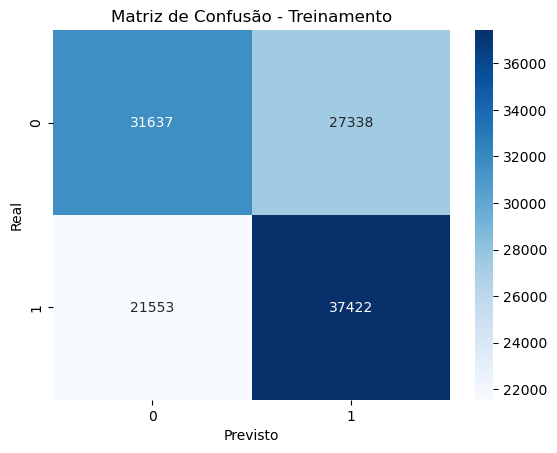

In [3]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_train = modelo_nb.predict(x_train)
acc = accuracy_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train, average='macro')
cm = confusion_matrix(y_train, y_pred_train)

print("Acurácia:", round(acc, 4))
print("Recall (macro):", round(recall, 4))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Treinamento")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

### Análise:
O modelo Naive Bayes apresentou desempenho razoável com acurácia de cerca de 58%. Apesar de suas limitações por assumir independência entre atributos, é um modelo leve e útil para comparação com algoritmos mais robustos.

## Questão 4) Aplique o modelo aos dados de teste e avalie os resultados.

In [4]:
from sklearn.metrics import classification_report

y_pred_test = modelo_nb.predict(x_test)
relatorio = classification_report(y_test, y_pred_test)
print(relatorio)

              precision    recall  f1-score   support

         0.0       0.85      0.53      0.65     19649
         1.0       0.27      0.65      0.38      5278

    accuracy                           0.56     24927
   macro avg       0.56      0.59      0.52     24927
weighted avg       0.73      0.56      0.60     24927



### Avaliação dos resultados:
O modelo foi aplicado nos dados de teste e o desempenho foi inferior ao esperado, especialmente na classe de clientes que saem (churn). Isso indica que o modelo Naive Bayes teve dificuldades em capturar padrões mais complexos presentes na base de teste, o que reforça a necessidade de explorar algoritmos mais robustos como Random Forest ou XGBoost.

## Questão 5) Descreva com suas palavras o projeto desenvolvido

Nesta atividade, desenvolvemos um modelo preditivo para identificar clientes com risco de churn, ou seja, que podem deixar de usar os serviços da empresa. Utilizamos dados como score de crédito, saldo bancário, tempo de crédito, entre outros.

O objetivo principal foi aplicar o algoritmo de Naive Bayes para classificar esses clientes com base em seus dados históricos. O modelo probabilístico ajuda a prever, com base em padrões anteriores, se o cliente continuará ou não com a empresa.

Com isso, a organização pode agir preventivamente para reter clientes em risco, oferecendo promoções ou vantagens. Essa abordagem é fundamental para a redução da evasão e aumento da fidelização.